<a href="https://colab.research.google.com/github/FrancescoBalzan/pymdp/blob/master/Teaching_to_Teach.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
pip install inferactively-pymdp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.9/159.9 kB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 47.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.2/77.2 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.1/121.1 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 78.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 55.8 MB/s eta 0:00:00
  Attempting uninstall: sphinx
    Found existing installation: Sphinx 5.0.2
    Uninstalling Sphinx-5.0.2:
      Successfully uninstalled Sphinx-5.0.2


Agents definition

In [12]:
import pymdp
from pymdp import utils
from pymdp.agent import Agent

#Teacher Agent

#num_obs = [3, 5] # observation modality dimensions
#num_states = [4, 2, 3] # hidden state factor dimensions
#num_controls = [4, 1, 1] # control state factor dimensions
#A_array = utils.random_A_matrix(num_obs, num_states) # create sensory likelihood (A matrix)
#B_array = utils.random_B_matrix(num_states, num_controls) # create transition likelihood (B matrix)

#C_vector = utils.obj_array_uniform(num_obs) # uniform preferences

# instantiate a quick agent using your A, B and C arrays
#my_agent = Agent( A = A_array, B = B_array, C = C_vector)

# give the agent a random observation and get the optimized posterior beliefs

#observation = [1, 4] # a list specifying the indices of the observation, for each observation modality

#qs = my_agent.infer_states(observation) # get posterior over hidden states (a multi-factor belief)

# Do active inference

#q_pi, neg_efe = my_agent.infer_policies() # return the policy posterior and return (negative) expected free energies of each policy as well

#action = my_agent.sample_action() # sample an action from the posterior over policies


In pymdp, both generative model distributions (e.g. A or B) as well as posterior distributions over hidden states (e.g. qs) and observations are represented as what we call “object arrays”.

Their array elements can be arbitrary Python data structures or objects. The entries of an object array can thus have arbitrary type and dimensionality.

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Object arrays can be initialized standard numpy constructors, but by also explicitly declaring dtype = object.

In [14]:
my_empty_array = np.empty(5, dtype = object)

useful functions

In [15]:
def plot_likelihood(matrix, title_str = "Likelihood distribution (A)"):
    """
    Plots a 2-D likelihood matrix as a heatmap
    """

    if not np.isclose(matrix.sum(axis=0), 1.0).all():
      raise ValueError("Distribution not column-normalized! Please normalize (ensure matrix.sum(axis=0) == 1.0 for all columns)")

    fig = plt.figure(figsize = (6,6))
    ax = sns.heatmap(matrix, cmap = 'gray', cbar = False, vmin = 0.0, vmax = 1.0)
    plt.title(title_str)
    plt.show()


def plot_beliefs(belief_dist, title_str=""):
    """
    Plot a categorical distribution or belief distribution, stored in the 1-D numpy vector `belief_dist`
    """

    if not np.isclose(belief_dist.sum(), 1.0):
      raise ValueError("Distribution not normalized! Please normalize")

    plt.grid(zorder=0)
    plt.bar(range(belief_dist.shape[0]), belief_dist, color='r', zorder=3)
    plt.xticks(range(belief_dist.shape[0]))
    plt.title(title_str)
    plt.show()

Specify the dimensionalities of the hidden state factors, the control factors, and the observation modalities for the teacher Agent.
Here we have: - Teacher belief of student learning state: the prob that the student has learnt the Gravity formula.
- Teacher observations come from student actions and can result in [Correct, Not Correct; Hint request];
- Teacher actions are [Test Gravity on different Planet; Provide Hint on Gravity parameters].
- Teacher hidden state is the Student learning state
The actions of the teacher depend on the observation: if the observation is Correct, the action is Test Gravity on different Planet; if the observation is Not Correct or Hint request, the action should be Provide Hint on Gravity parameters. The belief should be updated based on actions and observations to achieve a better posterior belief probability than the starting probability belief on student's learning state.

- Student Belief on planets' gravity
--use discrete parameters regarding the belief of the student about the parameters involved in the g thoery.
- Student Observation: [Correct; Not Correct; Hint on Gravity parameters]
- Student actions: [Respond to test on different planet; Ask for Hint]
- Student hidden state: The gravity theory used for identifying the right G for every planet

The actions of the student depend on the observation:  if the observation is Correct, the action is Respond to test on different Planet and vice versa;  if the observation is Not Correct the action should be Ask Hint on Gravity parameters. The belief should be updated based on actions and observations to achieve a better posterior belief probability than the starting probability belief on Planets' gravity.

Definire la belief probability dello studente per quanto riguarda la teoria della gravità, in maniera discreta. Operare come il gioco indovina chi: lo studente haun set di parametri che può chiedere all'insegnante il quale gli risponde Si/No

In [16]:
context_names_T = ['Concept Learnt', 'Concept not learnt']
choice_names_T = ['Test', 'Hint Parameter']

""" Define `num_states` and `num_factors` below """
num_states_T = [len(context_names_T), len(choice_names_T)]
num_factors_T = len(num_states_T)

context_action_names_T = ['Do-nothing']
choice_action_names_T = ['Test Gravity on a different planet', 'Provide Hint on gravity parameters']
hint_action_names_T = ['Hint on G', 'Hint on Mass and Distance', 'General Hint']

""" Define `num_controls` below """
num_controls_T = [len(context_action_names_T), len(choice_action_names_T), len(hint_action_names_T)]

response_obs_names_T = ['Correct', 'Incorrect',]
request_obs_names_T = ['Request Specification', 'No Request']

""" Update `num_obs_P` and `num_modalities_P` below to include all observation categories from the student """
num_obs_T = [len(response_obs_names_T), len(request_obs_names_T)]
num_modalities_T = len(num_obs_T)

Specify the dimensionalities of the hidden state factors, the control factors, and the observation modalities for the Student Agent


In [2]:
context_names_S = ['Concept Learnt', 'Concept not learnt']
choice_names_S = ['Question', 'Answer']

""" Define `num_states` and `num_factors` below """
num_states_S = [len(context_names_S), len(choice_names_S)]
num_factors_S = len(num_states_S)

context_action_names_S = ['Do-nothing']
choice_action_names_S = ['Ask fot specification', 'Respond to question']

""" Define `num_controls` below """
num_controls_S = [len(context_action_names_S), len(choice_action_names_S)]

test_obs_names_S = ['Correct', 'Incorrect']
hint_obs_names_S = ['Hint on G', 'Hint on Mass', 'Hint on R']
question_obs_names_S = ['Simple Gravity Question', 'Gravity Question on New Planet']

""" Update `num_obs_S` and `num_modalities_S` below to include all observation categories """
num_obs_S = [len(test_obs_names_S), len(hint_obs_names_S), len(question_obs_names_S)]
num_modalities_S = len(num_obs_S)

start from here and go to A matrix definition

In [113]:
import pymdp
from pymdp import utils
from pymdp.maths import softmax

In [19]:


# For the teacher
num_modalities_T = len(response_obs_names_T)  # Adjust this based on your actual model
A_teacher = utils.obj_array(num_modalities_T)

# For the student
num_modalities_S = len(hint_obs_names_S)  # Adjust this based on your actual model
A_student = utils.obj_array(num_modalities_S)




In [49]:

# Teacher's perspective: Effect of actions on observing student responses
p_correct = 0.7  # Probability that the student responds correctly to a question after a hint
p_incorrect = 0.3  # Probability of incorrect response


for choice_id, choice_name in enumerate(choice_names_T):
    if choice_names_T == 'Test':
        # For each context (concept learnt or not), we need to provide probabilities for all response types
        # Since `A_teacher[:, context, choice]` expects an array matching the number of response types,
        # and given we have 2 contexts, we should iterate over contexts instead of directly assigning to them
        for context_id in range(len(context_names_T)):
            if context_id == 0: # Concept Learnt
                A_teacher[:, context_id, choice_id] = [p_correct, p_incorrect]
            else: # Concept Not Learnt
                A_teacher[:, context_id, choice_id] = [p_incorrect, p_correct]
    elif choice_names_T == 'Hint Parameter':
        # Repeat the logic for 'Hint Parameter', adjusting probabilities as needed
        for context_id in range(len(context_names_T)):
            if context_id == 0: # Concept Learnt, hint improves chances
                A_teacher[:, context_id, choice_id] = [p_correct + 0.1, p_incorrect - 0.05]
            else: # Concept Not Learnt, hint slightly improves understanding
                A_teacher[:, context_id, choice_id] = [p_incorrect - 0.05, p_correct + 0.1]



# Student's perspective: Effect of teacher's actions on receiving hints
p_hint_received = 0.9  # Probability of effectively receiving and understanding a hint
p_no_hint = 0.1  # Probability of not receiving or misunderstanding the hint

for choice_id, choice_name in enumerate(choice_names_S):
    if choice_names_S == 'Ask for Specification':
        A_student[:, :, choice_id] = np.array([[p_no_hint, p_hint_received],  # No Hint, Hint received
                                               [p_hint_received, p_no_hint]])  # High chance of getting a useful hint
    elif choice_names_S == 'Respond to Question':
        A_student[:, :, choice_id] = np.array([[1.0, 0.0],  # Default response, no new hint provided
                                               [0.0, 1.0]])  # No operation for this action, placeholder

# Assuming A is your observation model array for the entire system
A = [None, None]  # Placeholder for the system's observation models
A[0] = A_teacher  # Update the teacher's observation model with the newly defined matrix
A[1] = A_student  # Update the student's observation model


test for error

In [84]:
# Example debug print statement before an assignment
print("Target slice shape:", A_teacher[:, :, choice_id].shape)
print("Data shape:", np.array([[p_correct, p_incorrect], [p_incorrect, p_correct]]).shape)


Target slice shape: (2, 2)
Data shape: (2, 2)


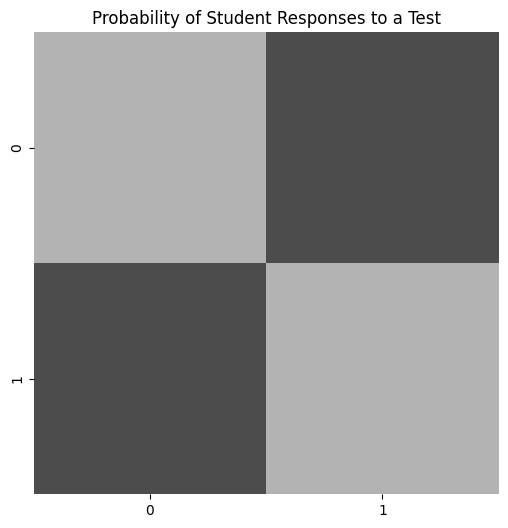

In [85]:
plot_likelihood(A_teacher[:, :, 0], title_str="Probability of Student Responses to a Test")

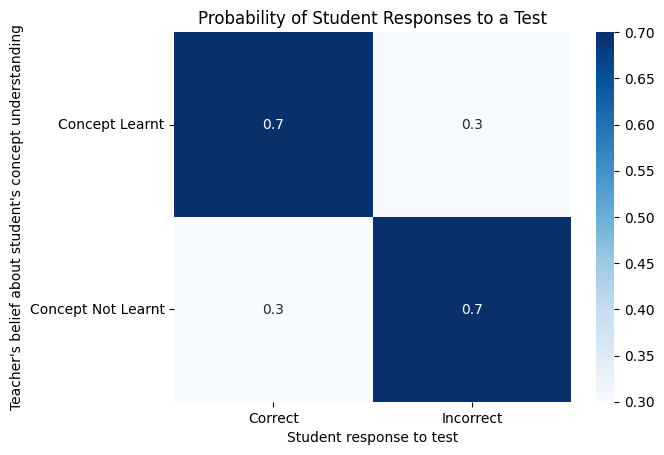

In [53]:
# Here we are plotting the probabilities for the 'Test' action (choice_id 0)
sns.heatmap(A_teacher[:, :, 0], annot=True, cmap='Blues', cbar=True)
plt.yticks(ticks=[0.5, 1.5], labels=['Concept Learnt', 'Concept Not Learnt'], rotation=0)
plt.xticks(ticks=[0.5, 1.5], labels=['Correct', 'Incorrect'])
plt.title("Probability of Student Responses to a Test")
plt.ylabel("Teacher's belief about student's concept understanding")
plt.xlabel("Student response to test")
plt.show()

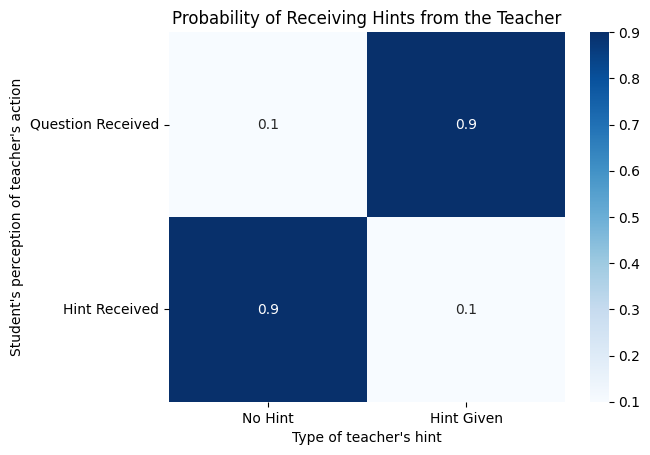

In [52]:
# Here we are plotting the probabilities for the 'Ask for Specification' action (choice_id 0)
sns.heatmap(A_student[:, :, 0], annot=True, cmap='Blues', cbar=True)
plt.yticks(ticks=[0.5, 1.5], labels=['Question Received', 'Hint Received'], rotation=0)
plt.xticks(ticks=[0.5, 1.5], labels=['No Hint', 'Hint Given'])
plt.title("Probability of Receiving Hints from the Teacher")
plt.ylabel("Student's perception of teacher's action")
plt.xlabel("Type of teacher's hint")
plt.show()

 choice observation modality for the student, a sub-array of A which we'll call A_choice_S

In [29]:
A_choice_S = np.zeros((len(test_obs_names_S), len(context_names_S), len(choice_names_S)))

for choice_id in range(len(choice_names_S)):

  A_choice_S[choice_id, :, choice_id] = 1.0

A[1] = A_choice_S

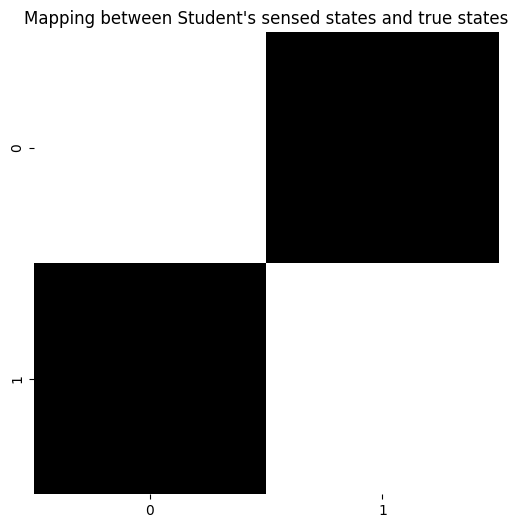

In [32]:
""" Condition on context (first hidden state factor) and display the remaining indices (outcome and choice state) """

plot_likelihood(A[1][:,0,:], "Mapping between Student's sensed states and true states")

 choice observation modality for the teacher, a sub-array of A which we'll call A_choice_T

In [135]:
A_choice_T = np.zeros((len(response_obs_names_T), len(context_names_T), len(choice_names_T)))

for choice_id in range(len(choice_names_T)):

  A_choice_T[choice_id, :, choice_id] = 1.0

A[1] = A_choice_T

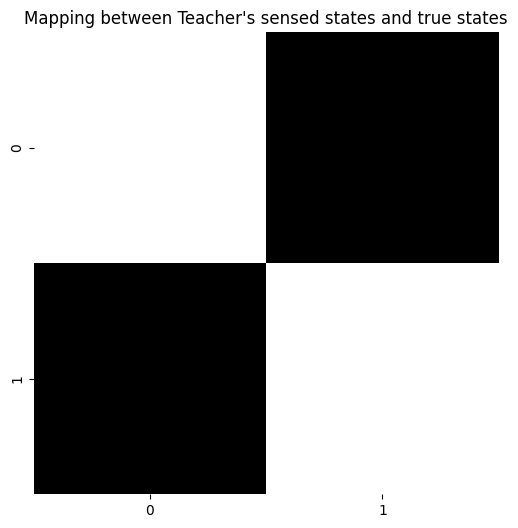

In [36]:
plot_likelihood(A[1][:,0,:], "Mapping between Teacher's sensed states and true states")

B Matrix - transition matrix -  encodes the probabilities of transitioning from one hidden state to another given a particular action.

For the teacher agent, the B matrix could represent the probability of the student's learning state transitioning from one level of understanding to another (e.g., from 'partially understands' to 'fully understands') as a result of the teacher's actions (e.g., providing a hint, conducting a test).

For the student agent, the B matrix could reflect the change in the student's own internal state of knowledge about gravity as a consequence of their actions (e.g., studying, asking for clarification) or in response to the teacher's actions.

In [93]:
# Assuming the teacher's model is concerned with the student's learning state
num_states_T = 2  # [Concept not learnt, Concept learnt]
num_actions_T = 2  # [Test, Provide Hint]
B_T = np.zeros((num_states_T, num_states_T, num_actions_T))

# Assuming "Test" action doesn't change the student's state directly
B_T[:, :, 0] = np.eye(num_states_T)

# Assuming "Provide Hint" can potentially lead to learning
# Placeholder probabilities for transition under "Provide Hint"
prob_hint_success = 0.2  # Chance that hint leads to learning
B_T[:, :, 1] = np.array([[0.8, prob_hint_success],
                               [0.2, 0.8]])  # Slight chance of unlearning if misconceptions are reinforced

In [94]:
# Assuming the student's model reflects their own learning progress
num_states_S = 2  # Same as teacher, for simplicity
num_actions_S = 2  # [Ask for specification, Respond to question]
B_S = np.zeros((num_states_S, num_states_S, num_actions_S))

# Assuming "Ask for specification" doesn't change the state
B_S[:, :, 0] = np.eye(num_states_S)

# "Respond to question" might change the learning state, based on the correctness of response
prob_response_success = 0.3  # Chance of improving understanding after responding
B_S[:, :, 1] = np.array([[0.7, prob_response_success],
                               [0.3, 0.7]])  # Reflecting the learning process


In [92]:
# Teacher Model
num_states_T = [len(context_names_T), len(choice_names_T)]
num_factors_T = len(num_states_T)

# Transition probability matrix for concept learning
B_concept_T = np.zeros((num_states_T[0], num_states_T[0], num_controls_T[1]))

# Assuming the 'Test Gravity on a different planet' action does not change the concept learning state
B_concept_T[:, :, 0] = np.eye(num_states_T[0])

B_concept_T /= B_concept_T.sum(axis=0, keepdims=True)

# Assuming the 'Provide Hint on gravity parameters' action can change the concept learning state
# Placeholder probabilities
B_concept_T[:, :, 1] = np.array([[0.9, 0.1], [0.1, 0.9]])


B_T = utils.obj_array(num_factors_T)
B_T[0] = B_concept_T  # Assign the transition matrix for concept learning to the first factor


<ipython-input-92-96a8e5a07e2d>:11: RuntimeWarning: invalid value encountered in divide
  B_concept_T /= B_concept_T.sum(axis=0, keepdims=True)


In [89]:
# Student Model
num_states_S = [len(context_names_S), len(choice_names_S)]
num_factors_S = len(num_states_S)

# Transition probability matrix for concept learning
B_concept_S = np.zeros((num_states_S[0], num_states_S[0], num_controls_S[1]))

# Assuming the 'Ask for specification' action does not directly change the learning state
B_concept_S[:, :, 0] = np.eye(num_states_S[0])

# Assuming the 'Respond to question' action reflects understanding and could change the learning state
# Placeholder probabilities
B_concept_S[:, :, 1] = np.array([[0.8, 0.2], [0.2, 0.8]])

B_S = utils.obj_array(num_factors_S)
B_S[0] = B_concept_S  # Assign the transition matrix for concept learning to the first factor

In [95]:
assert all(elem is not None for elem in B_S), "Some elements of B_S are undefined"
assert all(elem is not None for elem in B_T), "Some elements of B_T are undefined"


C vector - It encodes the desirability of different observations or outcomes from the agent's perspective.

In [174]:


# Initialize the C vectors for the teacher and the student with the correct number of observation modalities
C_T = utils.obj_array(2)
C_S = utils.obj_array(2)

# Define and assign preferences for the teacher's C vector
C_T[0] = softmax(np.array([1.0, -1.0]))  # the first modality (response) prefers correct answers over incorrect
C_T[1] = softmax(np.array([-0.5, 0.0]))  # the second modality (request) slightly disincentivizes requests

C_S[0] = softmax(np.array([1.0, -1.0]))  # Preferences for 'test' modality (Correct, Incorrect)
C_S[1] = softmax(np.zeros(2))  # Neutral preferences for 'hint' modality (Hint on G, Hint on Mass and Distance, General Hint)
#C_S[2] = softmax(np.zeros(2))  # Neutral preferences for the third modality (question)


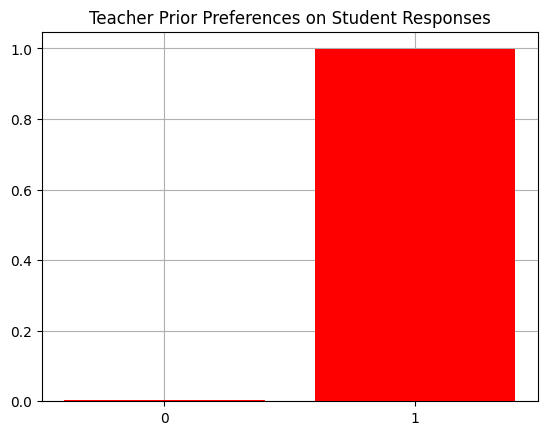

In [151]:
response_obs_names_T = ['Correct', 'Incorrect']  # Example, adjust as needed

# Initialize the rewards for the response observations
C_T_response = np.zeros(len(response_obs_names_T))
C_T_response[0] = -4.0  # Disliking incorrect answers
C_T_response[1] = 2.0   # Preferring correct answers

# Apply softmax to convert the rewards into preferences (probabilities)
C_T[0] = softmax(C_T_response)  # Assuming the first modality relates to response observations

# Plot the beliefs (preferences) for the teacher's prior preferences on student responses
plot_beliefs(softmax(C_T_response), title_str="Teacher Prior Preferences on Student Responses")

D Vector - the agent's belief about the state of the world before any observations are made.

In [68]:
D_S = utils.obj_array(num_factors_S)

D_S_context = np.array([0.5,0.5])

D_S[0] = D_S_context

D_S_choice = np.zeros(len(choice_names_S))

D_S_choice[choice_names_S.index("Respond to Question")] = 1.0

D_S[1] = D_S_choice

print(f'Student beliefs about learning state: {D_S[0]}')
print(f'Student beliefs about starting location: {D_S[1]}')

Beliefs about learning state: [0.5 0.5]
Beliefs about starting location: [0. 1.]


In [69]:
D_T = utils.obj_array(num_factors_S)

D_T_context = np.array([0.5,0.5])

D_T[0] = D_T_context

D_T_choice = np.zeros(len(choice_names_T))

D_T_choice[choice_names_T.index("Test")] = 1.0

D_T[1] = D_T_choice

print(f'Teacher beliefs about learning state: {D_S[0]}')
print(f'Teacher beliefs about starting location: {D_S[1]}')

Teacher beliefs about learning state: [0.5 0.5]
Teacher beliefs about starting location: [0. 1.]


Agents Construction

Normalization of the matrix

In [170]:
def normalize_matrix(matrix):
    """
    Normalizes a given matrix so that each column sums to 1.
    Assumes the first axis represents different observations.
    """
    column_sums = matrix.sum(axis=0, keepdims=True)
    normalized_matrix = matrix / column_sums
    return normalized_matrix

# Assuming A_student is an object array of observation matrices
A_student_normalized = np.empty_like(A_student, dtype=object)

for mod_idx, matrix in enumerate(A_student):
    A_student_normalized[mod_idx] = normalize_matrix(matrix)


A_teacher_normalized = A_teacher / A_teacher.sum(axis=0, keepdims=True)

In [164]:
from pymdp.agent import Agent

my_agent_S = Agent(A = A_student_normalized, B = B_S, C = C_S, D = D_S)

In [175]:
my_agent_T = Agent(A = A_teacher_normalized, B = B_T, C = C_T, D = D_T)

AssertionError: Check C vector: number of sub-arrays must be equal to number of observation modalities: 1